In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('anime.csv')

In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
genres= df['genre'].str.split(', ', expand=True)

In [6]:
genres

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12290,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12291,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
12292,Hentai,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
genres.shape


(12294, 13)

In [8]:
genres_list =[]
for i in range(0,12294):
    genres_list.append([str(genres.values[i,j]) for j in range(0,13)])
    

In [9]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
encoded = te.fit_transform(genres_list)
genre = pd.DataFrame(encoded, columns= te.columns_)
genre.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,nan
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.drop('genre', axis = 1 , inplace = True)
df1= pd.concat([df,genre] , axis = 1)

In [11]:
#dropping unnecessary columns
df1.drop('anime_id', axis = 1, inplace =True)

In [12]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12294 non-null  object 
 1   type           12269 non-null  object 
 2   episodes       12294 non-null  object 
 3   rating         12064 non-null  float64
 4   members        12294 non-null  int64  
 5   Action         12294 non-null  bool   
 6   Adventure      12294 non-null  bool   
 7   Cars           12294 non-null  bool   
 8   Comedy         12294 non-null  bool   
 9   Dementia       12294 non-null  bool   
 10  Demons         12294 non-null  bool   
 11  Drama          12294 non-null  bool   
 12  Ecchi          12294 non-null  bool   
 13  Fantasy        12294 non-null  bool   
 14  Game           12294 non-null  bool   
 15  Harem          12294 non-null  bool   
 16  Hentai         12294 non-null  bool   
 17  Historical     12294 non-null  bool   
 18  Horror

In [13]:
df1['episodes'] =pd.to_numeric(df1['episodes'], errors = 'coerce')
df1['episodes'].fillna(df1['episodes'].mean(), inplace = True)
df1['rating'].fillna(df1['rating'].mean(), inplace = True)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_14432\1315573410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['episodes'].fillna(df1['episodes'].mean(), inplace = True)
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_14432\1315573410.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [14]:
#dropping nan column
df1.drop('nan', axis = 1,inplace = True)


Text(0.5, 1.0, ' Broadcastwise  distribution of anime')

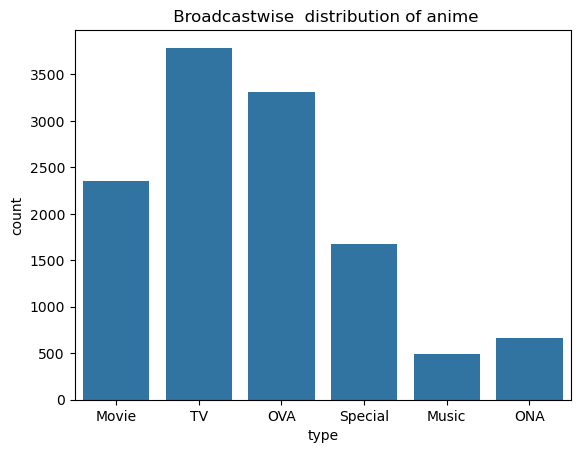

In [15]:
sns.countplot(data = df1, x ='type')
plt.title(' Broadcastwise  distribution of anime')

In [16]:
df1.columns

Index(['name', 'type', 'episodes', 'rating', 'members', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'None', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_14432\501556463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['rating'], kde = True)


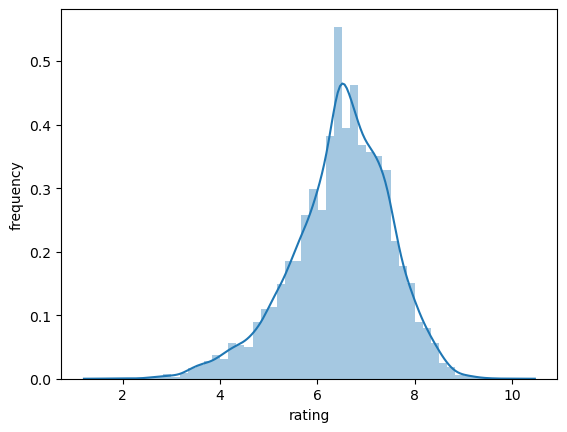

In [17]:
sns.distplot(df1['rating'], kde = True)
plt.ylabel('frequency')
plt.show()


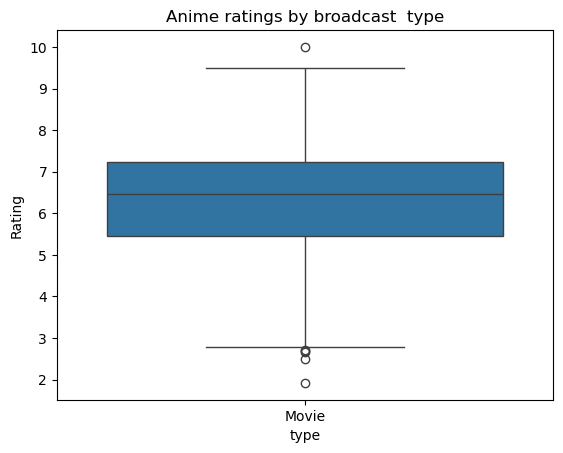

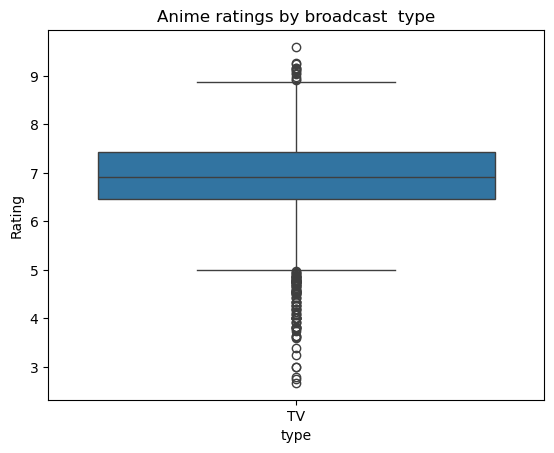

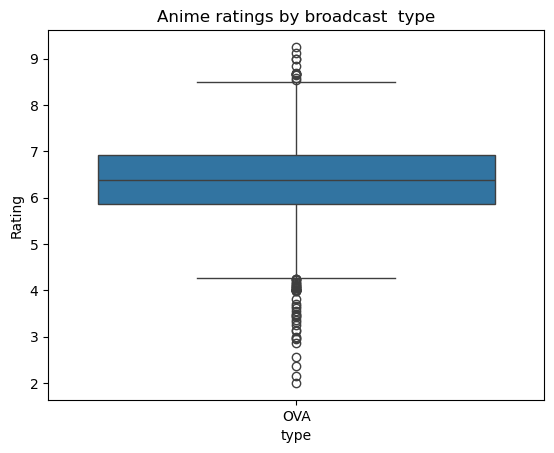

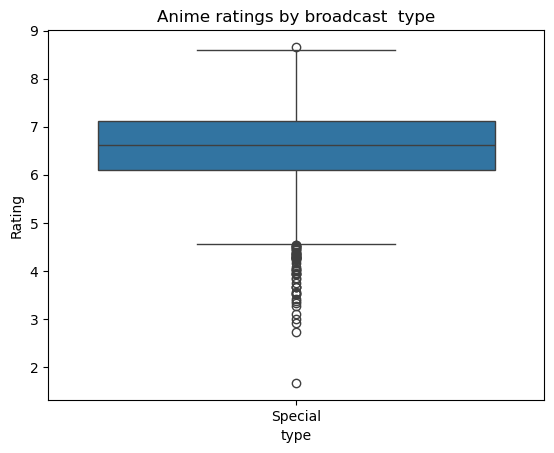

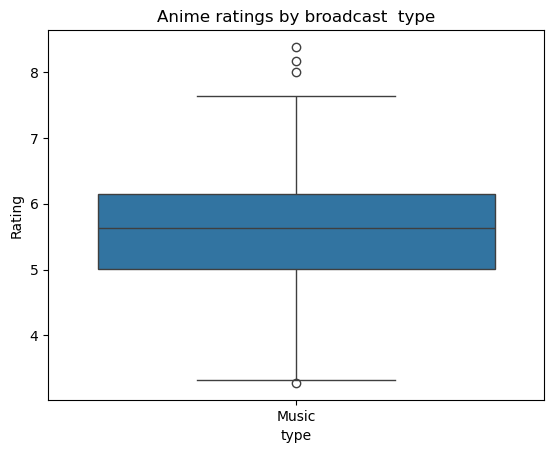

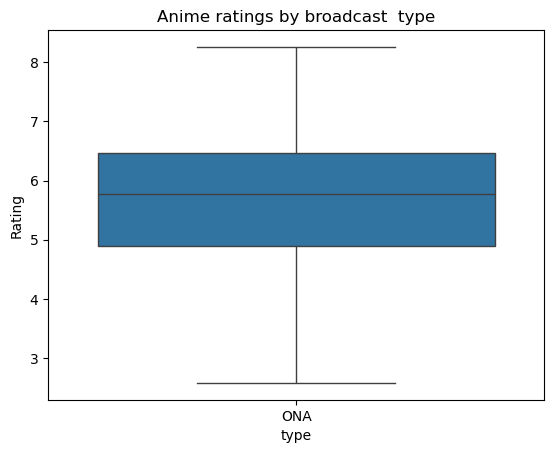

No data available for type: nan


In [18]:
for i in df1['type'].unique():
    if not df1[df1['type'] == i].empty:
        sns.boxplot(data = df1[df1['type'] == i] , x = 'type', y = 'rating')
        plt.title('Anime ratings by broadcast  type')
        plt.ylabel('Rating')
        plt.show()
    else:
        print(f"No data available for type: {i}")

In [19]:
df1.columns

Index(['name', 'type', 'episodes', 'rating', 'members', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'None', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen',
       'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [20]:
#encoding categorical columns
df1.head(2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = [
     'type', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 
    'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 
    'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 
    'Mecha', 'Military', 'Music', 'Mystery', 'None', 'Parody', 'Police', 
    'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 
    'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 
    'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 
    'Vampire', 'Yaoi', 'Yuri']

In [21]:
for column in columns_to_encode:
    if column in df1.columns:
        df1[column] = le.fit_transform(df1[column])

df1

,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Kimi no Na wa.,0,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,5,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,5,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,5,24.0,9.17,673572,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Gintama&#039;,5,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,3,1.0,4.15,211,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,3,1.0,4.28,183,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,3,4.0,4.88,219,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,3,1.0,4.98,175,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#performing pca to all the genres to reduce the number of dimensions
from sklearn.decomposition import PCA
pca = PCA(0.90)

In [23]:
reduced_cols = pca.fit_transform(df1.iloc[:, 5:])
reduced_cols =pd.DataFrame(reduced_cols )
reduced_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12294 non-null  float64
 1   1       12294 non-null  float64
 2   2       12294 non-null  float64
 3   3       12294 non-null  float64
 4   4       12294 non-null  float64
 5   5       12294 non-null  float64
 6   6       12294 non-null  float64
 7   7       12294 non-null  float64
 8   8       12294 non-null  float64
 9   9       12294 non-null  float64
 10  10      12294 non-null  float64
 11  11      12294 non-null  float64
 12  12      12294 non-null  float64
 13  13      12294 non-null  float64
 14  14      12294 non-null  float64
 15  15      12294 non-null  float64
 16  16      12294 non-null  float64
 17  17      12294 non-null  float64
 18  18      12294 non-null  float64
 19  19      12294 non-null  float64
 20  20      12294 non-null  float64
 21  21      12294 non-null  float64
 22

In [24]:
new_df = pd.concat([df1.iloc[:,0:5],reduced_cols] , axis = 1)
new_df.head()

,name,type,episodes,rating,members,0,1,2,3,4,...,15,16,17,18,19,20,21,22,23,24
0,Kimi no Na wa.,0,1.0,9.37,200630,-0.226926,-0.391823,-0.372352,1.300827,0.352782,...,-0.304230,0.095490,-0.103767,-0.143857,-0.099573,0.314485,-0.148655,0.001621,-0.105334,-0.050633
1,Fullmetal Alchemist: Brotherhood,5,64.0,9.26,793665,1.267728,0.503057,0.743923,0.844707,0.246717,...,0.035023,0.109350,0.476218,0.039342,0.311542,-0.056777,-0.466617,0.529825,0.212565,0.173747
2,Gintama°,5,51.0,9.25,114262,0.530561,0.977652,-0.699539,-0.323888,0.049078,...,-0.378111,-0.698548,0.077280,0.033607,0.123559,0.071232,-0.067268,-0.090203,-0.535551,0.721123
3,Steins;Gate,5,24.0,9.17,673572,0.287237,-0.358705,-0.375443,-0.265867,-0.357171,...,0.260881,-0.340495,-0.180579,0.038982,-0.083910,0.036095,-0.065130,-0.033849,-0.101879,-0.090942
4,Gintama&#039;,5,51.0,9.16,151266,0.530561,0.977652,-0.699539,-0.323888,0.049078,...,-0.378111,-0.698548,0.077280,0.033607,0.123559,0.071232,-0.067268,-0.090203,-0.535551,0.721123


In [25]:
new_df.columns = new_df.columns.astype(str) # did to use standardscaling because that needs all the features in string

In [26]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
scaled_features = StandardScaler.fit_transform(new_df.iloc[:, 2:])


In [27]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
# Compute cosine similarity
cosine_sim = cosine_similarity(scaled_features)
cosine_sim

array([[ 1.        ,  0.45717603,  0.0903484 , ..., -0.29464563,
        -0.28610658, -0.24411718],
       [ 0.45717603,  1.        ,  0.21577617, ..., -0.18187788,
        -0.18059737, -0.1659603 ],
       [ 0.0903484 ,  0.21577617,  1.        , ..., -0.21674137,
        -0.21238879, -0.18041448],
       ...,
       [-0.29464563, -0.18187788, -0.21674137, ...,  1.        ,
         0.99949649,  0.98780638],
       [-0.28610658, -0.18059737, -0.21238879, ...,  0.99949649,
         1.        ,  0.99164536],
       [-0.24411718, -0.1659603 , -0.18041448, ...,  0.98780638,
         0.99164536,  1.        ]])

In [29]:
def get_recommendation(target_index): #needs to put the index
    sim_score = list(enumerate(cosine_sim[target_index])) #to get the cosine similarilty with all entries.
    sim_scores =sorted(sim_score , key=lambda x: x[1], reverse= True) #sorting as per similarity
    sim_scores = [score for score in sim_scores if score[1] >= 0.8 and score[0] != target_index] #setting threshold as 0.8 and to remove same target_index
    anime_indices = [score[0] for score in sim_scores] #get the anime indices
    recommended_anime = df['name'].iloc[anime_indices].tolist() #indices
    return recommended_anime 

In [30]:
get_recommendation(5)

['Haikyuu!! Second Season',
 'Haikyuu!! Movie 1: Owari to Hajimari',
 'Haikyuu!! Movie 2: Shousha to Haisha',
 'Slam Dunk',
 'Haikyuu!!',
 'Rokudenashi Blues',
 'Kuroko no Basket: Tip Off',
 'Diamond no Ace: Second Season',
 'Kuroko no Basket 3rd Season',
 'Prince of Tennis: The National Tournament Finals',
 'Diamond no Ace',
 'Kuroko no Basket NG-shuu',
 'Batsu &amp; Terry',
 'Kuroko no Basket: Baka ja Katenai no yo!',
 'Kuroko no Basket: Mou Ikkai Yarimasen ka',
 'Prince of Tennis: Another Story - Messages From Past and Future',
 'Area no Kishi',
 'Diamond no Ace OVA',
 'Kuroko no Basket: Oshaberi Shiyokka',
 'Hajime no Ippo: New Challenger',
 'Hajime no Ippo: Rising',
 'Kuroko no Basket: Oshaberi Demo Shimasen ka',
 'Kuroko no Basket 2nd Season',
 'Yowamushi Pedal',
 'Yowamushi Pedal: Grande Road',
 'Major S1',
 'Diamond no Ace: Second Season OVA',
 'Major S2',
 'Major S4',
 'Teekyuu 3',
 'Houkago no Ouji-sama',
 'Teekyuu',
 'Teekyuu 2',
 'Hajime no Ippo',
 'Slam Dunk: Hoero Basketm

### 1. **Difference Between User-Based and Item-Based Collaborative Filtering**:
- **User-Based**: Recommends items based on users with similar preferences.
- **Item-Based**: Recommends items similar to those the user has already liked.

**Key Difference**: User-based compares users, while item-based compares items.

---

### 2. **What is Collaborative Filtering?**
- **Collaborative Filtering**: Recommends items based on the preferences of many users. It works by finding patterns in user behavior.
  - **User-User**: Recommends based on similar users.
  - **Item-Item**: Recommends similar items to those already liked by the user.